# Problem 1:

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 
voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given
information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.



**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent 
    ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion

## 1.1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it.

In [2]:
plt.savefig("Election_Data.png", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [3]:
data1=pd.read_csv("Election_Data.csv")
plt.savefig("Election_Data.png", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [4]:
data1.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
data1.shape

(1525, 10)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [7]:
data1.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [8]:
# count unique values of numerical categorical variable which is int type

In [9]:
data1["economic.cond.national"].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [10]:
data1["economic.cond.household"].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [11]:
data1["Blair"].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [12]:
data1["Hague"].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [13]:
data1["political.knowledge"].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [14]:
data1["Europe"].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [15]:
# class proportion of variables

In [16]:
data1["vote"].value_counts(normalize="true")

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [17]:
# unique values for categorical variable which is object type

In [18]:
for feature in data1.columns:
    if data1[feature].dtypes=="object":
        print(feature.upper(),":",data1[feature].nunique())
        print(data1[feature].value_counts().sort_values())
        print("\n")
    

VOTE : 2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER : 2
male      713
female    812
Name: gender, dtype: int64




In [19]:
# drop the unwanted column
data1=data1.drop("Unnamed: 0",axis=1)
data1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [20]:
data1.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [21]:
data1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data1.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [23]:
# econmic.cond.national,economic.cond.household ,Blair,Europe,political.knowledge are left skew.
# Hague and age are partially normally distributed close to zero.

In [24]:
# check missing values

In [25]:
data1.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [26]:
# no missing values present in data.

In [27]:
# check no of duplicates rows
dupes=data1.duplicated()
print("no of duplictes rows:%d" %sum(dupes))

no of duplictes rows:8


In [28]:
# drop duplicates:
data1=data1.drop_duplicates()


In [29]:
data1.shape

(1517, 9)

# 1.2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

In [30]:
# check for outliers

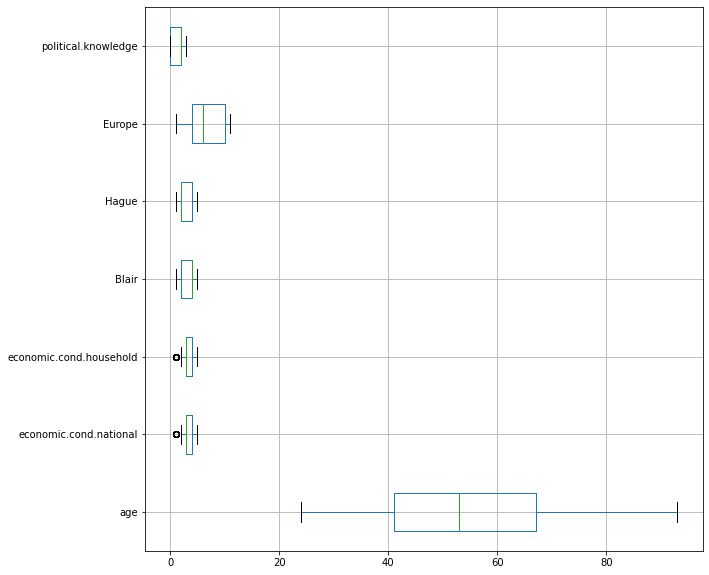

In [31]:
plt.figure(figsize=(10,10))
data1.boxplot(vert=0)
plt.show()

In [32]:
# very very less no of outliers are present in data.That does not influence any significant impact.

# Univariate Analysis

In [33]:
data1.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

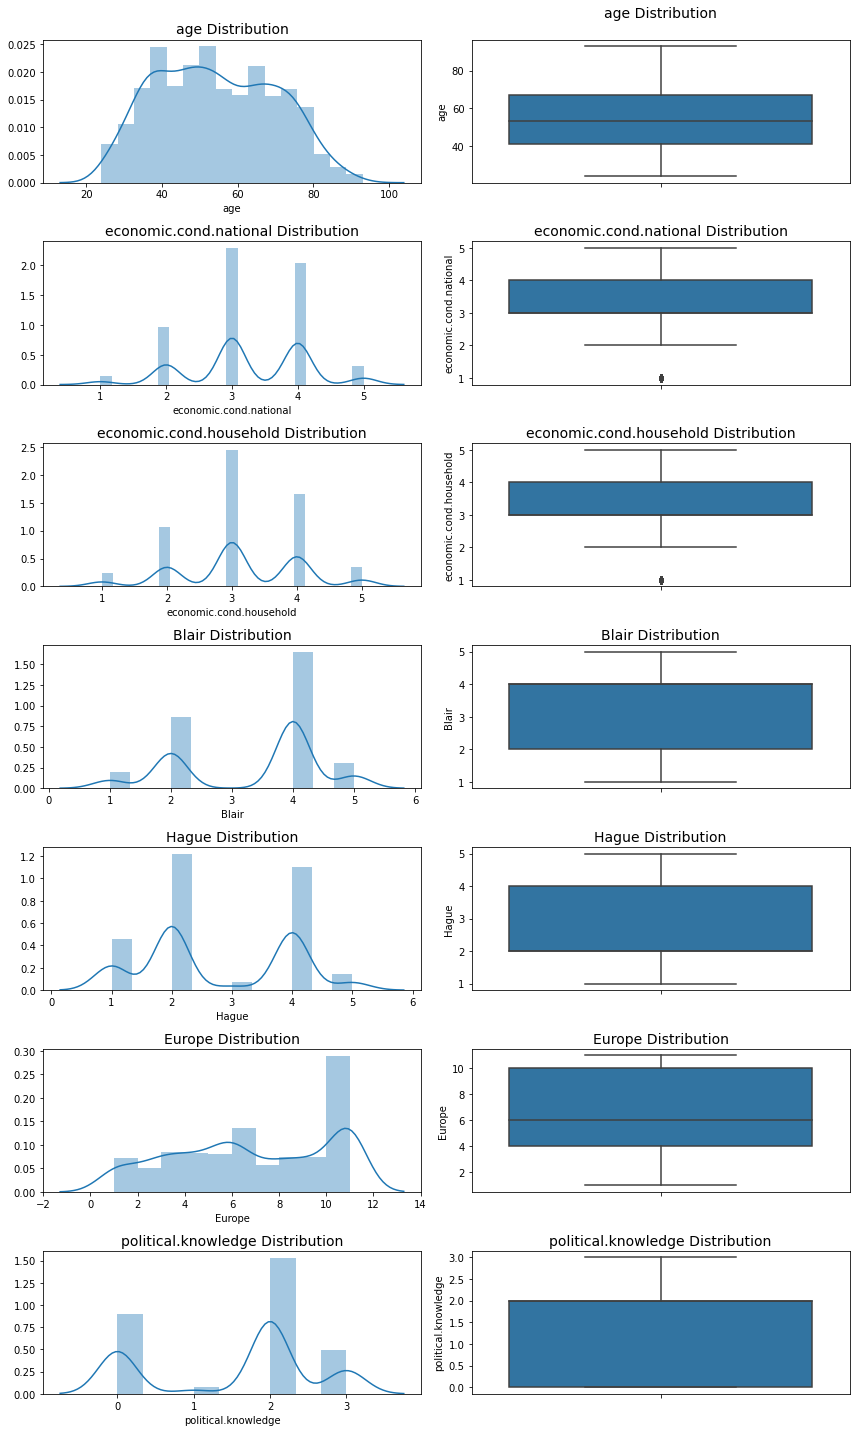

In [34]:
fig,axes=plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12,20)
a=sns.distplot(data1["age"],ax=axes[0][0])
a.set_title("age Distribution",fontsize=14)
a=sns.boxplot(data1["age"],orient="v",ax=axes[0][1])
a.set_title("age Distribution\n",fontsize=14)

a=sns.distplot(data1["economic.cond.national"],ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=14)
a=sns.boxplot(data1["economic.cond.national"],orient="v",ax=axes[1][1])
a.set_title("economic.cond.national Distribution",fontsize=14)

a=sns.distplot(data1["economic.cond.household"],ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=14)
a=sns.boxplot(data1["economic.cond.household"],orient="v",ax=axes[2][1])
a.set_title("economic.cond.household Distribution",fontsize=14)

a=sns.distplot(data1["Blair"],ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=14)
a=sns.boxplot(data1["Blair"],orient="v",ax=axes[3][1])
a.set_title("Blair Distribution",fontsize=14)

a=sns.distplot(data1["Hague"],ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=14)
a=sns.boxplot(data1["Hague"],orient="v",ax=axes[4][1])
a.set_title("Hague Distribution",fontsize=14)

a=sns.distplot(data1["Europe"],ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=14)
a=sns.boxplot(data1["Europe"],orient="v",ax=axes[5][1])
a.set_title("Europe Distribution",fontsize=14)

a=sns.distplot(data1["political.knowledge"],ax=axes[6][0])
a.set_title("political.knowledge Distribution",fontsize=14)
a=sns.boxplot(data1["political.knowledge"],orient="v",ax=axes[6][1])
a.set_title("political.knowledge Distribution",fontsize=14)


plt.tight_layout()
plt.show()

In [35]:
# only age is partially normally distributed.

In [36]:
# very less no of outliers.It is not having any effect.

# Bivariate analysis

In [37]:
data1.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

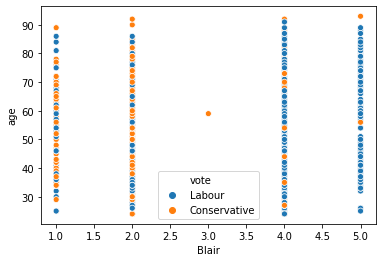

In [38]:
sns.scatterplot(data1["Blair"],data1["age"],hue=data1["vote"])

In [39]:
# in 4 th stage, Blair(leader of labour group) got maximum vote and approximately all age group pepole did voting to labour
#group.
# in 5th stage ,Blair got maximum  no of vote by all age[30-90] group people.
# in stage 1 and 2, maximum vote goes to conservative party leader Hague.

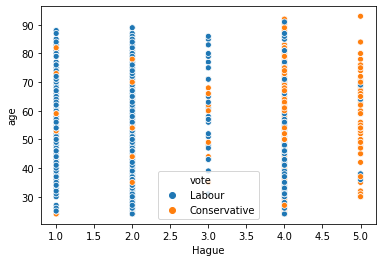

In [40]:
sns.scatterplot(data1["Hague"],data1["age"],hue=data1["vote"])

In [41]:
# in  stage 5,maximum vote goes to conservative grop leader.
# in stage 1 maximum vote goes to labour group.

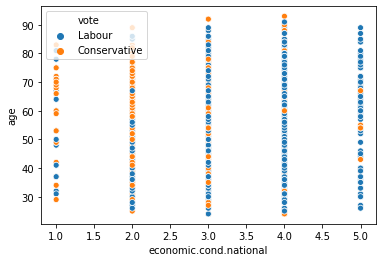

In [42]:
sns.scatterplot(data1["economic.cond.national"],data1["age"],hue=data1["vote"])

In [43]:
# the  people whose economic.cond.national are 3,4and 5,did  maximum no of voting to labour group leader. 


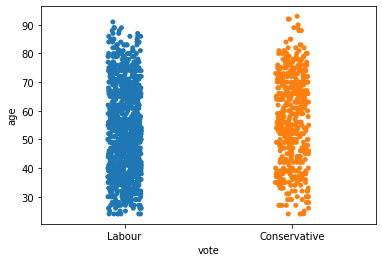

In [44]:
sns.stripplot(data1["vote"],data1["age"])

In [45]:
# Since concentration of dots is more for labour group as compared to conservative group for all age.So we can say ,pepople did 
# voting to labour group.Means labour group party  leader got maximum no of vote.

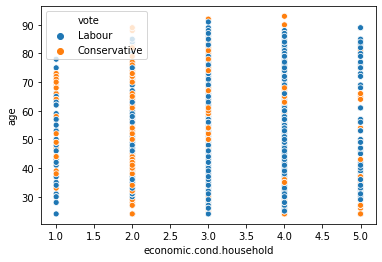

In [46]:
sns.scatterplot(data1["economic.cond.household"],data1["age"],hue=data1["vote"])

In [47]:
# people are having economic.cond.household 3,4 and 5 whose maximum vote goes to labour party.

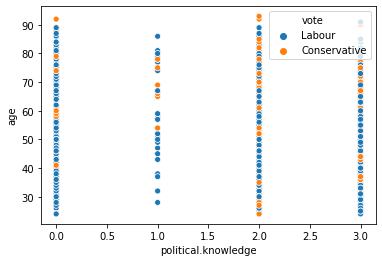

In [48]:
sns.scatterplot(data1["political.knowledge"],data1["age"],hue=data1["vote"])

In [49]:
# people are having 0 political knowledge whose maximum vote goes to labour party.
# People are having political knowledge 0,1,2,3 whose maximum vote goes to labour party.

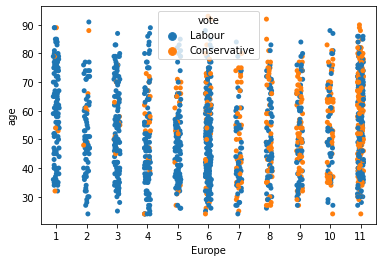

In [50]:
sns.stripplot(data1["Europe"],data1["age"],hue=data1["vote"])

In [51]:
# when attitude towards europen integration is low,[from 1 to 6]most of the vote goes to labour party .
# when attitude towards europen integration is high,approximate equal no of vote goes to conservative and labour party.

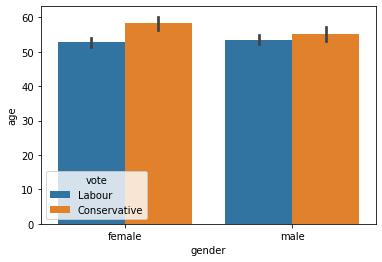

In [52]:
sns.barplot(data1["gender"],data1["age"],hue=data1["vote"])

In [53]:
# female vote  mostly goes to conservative party.

# multivariate analysis

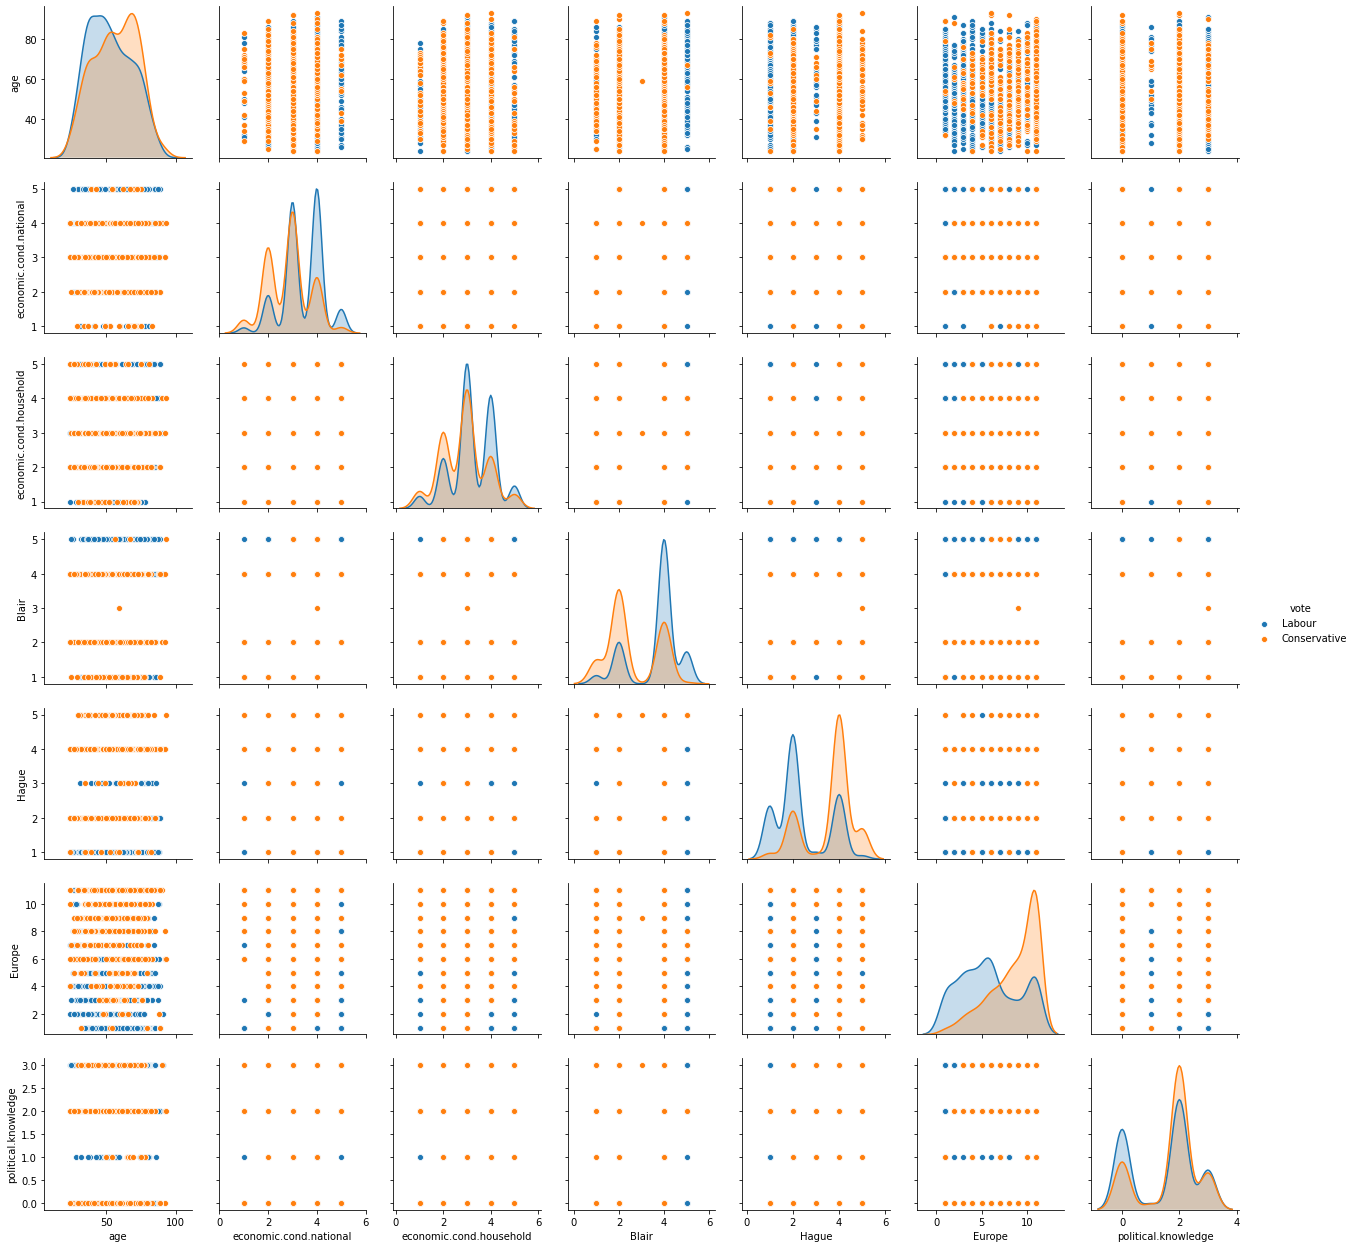

In [54]:
sns.pairplot(data1,hue="vote")

In [55]:
# classes are partially seprated for age and  well seprated for europen.We can conlcude these two variables are good predictor.
# the people having economic.condtion is 5 whose maximum vote goes to labour party.
# the people having score towards europen integretion is low  whose maximum  no of vote goes to labour party.


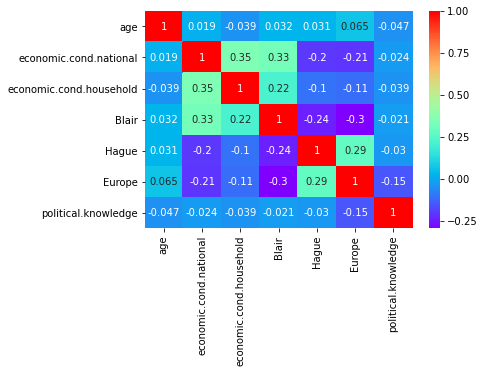

In [56]:
sns.heatmap(data1.corr(),annot=True,cmap="rainbow")

In [57]:
# there is hardly any correlation between numeric variable.


# DATA Preparation:

# 1.3. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [58]:

# Encode the data having string values

In [34]:
for feature in data1.columns:
    if data1[feature].dtypes=="object":
        data1[feature]=pd.Categorical(data1[feature]).codes

In [37]:
data1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


# Scaling

In [11]:
# No need of scaling here.All variables are in same scale.We should normalize when the scale of a feature is irrelevant or
# misleading, and not normalize when the scale is meaningful.

In [32]:


# create independent and dependent set
X=data1.drop("vote",axis=1)
y=data1.pop("vote")


In [33]:
# split the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Modelling

# 1.4. Apply Logistic Regression and LDA (linear discriminant analysis).

## LogisticRegression

In [170]:
logs_model=LogisticRegression()
logs_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
ytrain_predict=logs_model.predict(X_train)
ytest_predict=logs_model.predict(X_test)

In [172]:
#getting the preidiction classes and prob

In [173]:
# for train
ytrain_predict_prob=logs_model.predict_proba(X_train)
ytrain_predict_prob

array([[0.40358387, 0.59641613],
       [0.02596777, 0.97403223],
       [0.37359626, 0.62640374],
       ...,
       [0.9528207 , 0.0471793 ],
       [0.05526158, 0.94473842],
       [0.02134793, 0.97865207]])

In [174]:
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.403584,0.596416
1,0.025968,0.974032
2,0.373596,0.626404
3,0.036344,0.963656
4,0.090492,0.909508


In [175]:
# for test set
ytest_predict_prob=logs_model.predict_proba(X_test)
ytest_predict_prob

array([[0.34576303, 0.65423697],
       [0.47591002, 0.52408998],
       [0.09320857, 0.90679143],
       [0.93680948, 0.06319052],
       [0.697015  , 0.302985  ],
       [0.03054031, 0.96945969],
       [0.06692422, 0.93307578],
       [0.49622294, 0.50377706],
       [0.44375204, 0.55624796],
       [0.00733789, 0.99266211],
       [0.09175771, 0.90824229],
       [0.35696498, 0.64303502],
       [0.25907081, 0.74092919],
       [0.01143076, 0.98856924],
       [0.06618258, 0.93381742],
       [0.2727522 , 0.7272478 ],
       [0.02306915, 0.97693085],
       [0.47180965, 0.52819035],
       [0.28434367, 0.71565633],
       [0.00334745, 0.99665255],
       [0.34581562, 0.65418438],
       [0.05469554, 0.94530446],
       [0.0746606 , 0.9253394 ],
       [0.2017151 , 0.7982849 ],
       [0.09914106, 0.90085894],
       [0.03589351, 0.96410649],
       [0.00389542, 0.99610458],
       [0.29197567, 0.70802433],
       [0.81094729, 0.18905271],
       [0.66288205, 0.33711795],
       [0.

In [176]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.345763,0.654237
1,0.475910,0.524090
2,0.093209,0.906791
3,0.936809,0.063191
4,0.697015,0.302985


In [177]:
# performance on train set
ytrain_predict=logs_model.predict(X_train)
model_score=logs_model.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predict))
print(classification_report(y_train,ytrain_predict))

0.8312912346842601
[[221 107]
 [ 72 661]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [178]:
# performance on test set
ytest_predict=logs_model.predict(X_test)
model_score=logs_model.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predict))
print(classification_report(y_test,ytest_predict))

0.8355263157894737
[[ 86  46]
 [ 29 295]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       132
           1       0.87      0.91      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.83      0.84      0.83       456



## LDA:Linear Discriminant Analysis

In [1]:
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)

NameError: name 'LinearDiscriminantAnalysis' is not defined

In [74]:
ytrain_predict1=lda_model.predict(X_train)
ytest_predict1=lda_model.predict(X_test)

In [75]:
# getting the predicted classes and prob 

In [76]:
# for train

In [77]:
ytrain_predictprob1=lda_model.predict_proba(X_train)
ytrain_predictprob1

array([[0.34129188, 0.65870812],
       [0.01127672, 0.98872328],
       [0.38903348, 0.61096652],
       ...,
       [0.97477272, 0.02522728],
       [0.03898895, 0.96101105],
       [0.01223739, 0.98776261]])

In [78]:
pd.DataFrame(ytrain_predictprob1).head()

,0,1
0,0.341292,0.658708
1,0.011277,0.988723
2,0.389033,0.610967
3,0.020268,0.979732
4,0.079059,0.920941


In [79]:
# test set

In [80]:
ytest_predictprob1=lda_model.predict_proba(X_test)
ytest_predictprob1

array([[0.39385298, 0.60614702],
       [0.4483894 , 0.5516106 ],
       [0.07234473, 0.92765527],
       [0.96111937, 0.03888063],
       [0.75855452, 0.24144548],
       [0.0139558 , 0.9860442 ],
       [0.05050052, 0.94949948],
       [0.49008653, 0.50991347],
       [0.49927259, 0.50072741],
       [0.00318383, 0.99681617],
       [0.06501255, 0.93498745],
       [0.36073045, 0.63926955],
       [0.22217708, 0.77782292],
       [0.00654477, 0.99345523],
       [0.04147352, 0.95852648],
       [0.2509025 , 0.7490975 ],
       [0.0123279 , 0.9876721 ],
       [0.49472068, 0.50527932],
       [0.30597795, 0.69402205],
       [0.00135178, 0.99864822],
       [0.37335629, 0.62664371],
       [0.03774363, 0.96225637],
       [0.05241129, 0.94758871],
       [0.17154773, 0.82845227],
       [0.0787771 , 0.9212229 ],
       [0.02661536, 0.97338464],
       [0.00159872, 0.99840128],
       [0.25960136, 0.74039864],
       [0.88434974, 0.11565026],
       [0.74314703, 0.25685297],
       [0.

In [81]:
pd.DataFrame(ytest_predictprob1).head()

,0,1
0,0.393853,0.606147
1,0.448389,0.551611
2,0.072345,0.927655
3,0.961119,0.038881
4,0.758555,0.241445


In [82]:
# performance on training set
ytrain_predict1=lda_model.predict(X_train)
model_score=lda_model.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predict1))
print(classification_report(y_train,ytrain_predict1))

0.8312912346842601
[[222 106]
 [ 73 660]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [83]:
# performance on test set
ytest_predict1=lda_model.predict(X_test)
model_score=lda_model.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predict1))
print(classification_report(y_test,ytest_predict1))

0.8333333333333334
[[ 87  45]
 [ 31 293]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       132
           1       0.87      0.90      0.89       324

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



# 1.5. Apply KNN Model, Naïve Bayes Model and support vector machine (SVM) model. Interpret the results. 

In [191]:
from sklearn.neighbors import KNeighborsClassifier


In [192]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [193]:
ytrain_predict2=knn_model.predict(X_train)
ytest_predict2=knn_model.predict(X_test)

In [194]:
# getting predicting classes and prob

In [195]:
# for train set

In [196]:
ytrain_predict_prob2=knn_model.predict_proba(X_train)
ytrain_predict_prob2

array([[0.2, 0.8],
       [0. , 1. ],
       [0.6, 0.4],
       ...,
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ]])

In [197]:
pd.DataFrame(ytrain_predict_prob2).head()

,0,1
0,0.2,0.8
1,0.0,1.0
2,0.6,0.4
3,0.0,1.0
4,0.2,0.8


In [198]:
# for test set

In [199]:
ytest_predict_prob2=knn_model.predict_proba(X_test)
ytest_predict_prob2

array([[0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. ,

In [200]:
pd.DataFrame(ytest_predict_prob2).head()

,0,1
0,0.6,0.4
1,0.2,0.8
2,0.4,0.6
3,1.0,0.0
4,0.8,0.2


In [201]:
# performance matrix on train set
ytrain_predict2=knn_model.predict(X_train)
model_score=knn_model.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predict2))
print(classification_report(y_train,ytrain_predict2))

0.8567389255419415
[[242  86]
 [ 66 667]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       328
           1       0.89      0.91      0.90       733

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.85      0.86      0.86      1061



In [202]:
# performance matrix on test set
ytest_predict2=knn_model.predict(X_test)
model_score=knn_model.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predict2))
print(classification_report(y_test,ytest_predict2))

0.7785087719298246
[[ 73  59]
 [ 42 282]]
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       132
           1       0.83      0.87      0.85       324

    accuracy                           0.78       456
   macro avg       0.73      0.71      0.72       456
weighted avg       0.77      0.78      0.77       456



In [ ]:
# recall is low(0.87) on test set for majority class.

## Naive Bayse Model

In [254]:
from sklearn.naive_bayes import GaussianNB

In [255]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [256]:
ytrain_predict3=nb_model.predict(X_train)
ytest_predict3=nb_model.predict(X_test)

In [257]:
# getting predicted class amd probability

In [258]:
ytrain_predictprob3=nb_model.predict_proba(X_train)
ytrain_predictprob3

array([[0.56827489, 0.43172511],
       [0.00957325, 0.99042675],
       [0.39568854, 0.60431146],
       ...,
       [0.99424296, 0.00575704],
       [0.02570828, 0.97429172],
       [0.00313637, 0.99686363]])

In [259]:
pd.DataFrame(ytrain_predictprob3).head()

,0,1
0,0.568275,0.431725
1,0.009573,0.990427
2,0.395689,0.604311
3,0.008928,0.991072
4,0.033065,0.966935


In [260]:
# for test set

In [261]:
ytest_predictprob3=nb_model.predict_proba(X_test)
ytest_predictprob3

array([[2.14253404e-01, 7.85746596e-01],
       [6.19959526e-01, 3.80040474e-01],
       [4.78325998e-02, 9.52167400e-01],
       [9.78843168e-01, 2.11568317e-02],
       [7.54444386e-01, 2.45555614e-01],
       [1.03911988e-02, 9.89608801e-01],
       [1.57666090e-02, 9.84233391e-01],
       [6.04543334e-01, 3.95456666e-01],
       [4.43916348e-01, 5.56083652e-01],
       [9.84908160e-04, 9.99015092e-01],
       [3.76806244e-02, 9.62319376e-01],
       [4.03780496e-01, 5.96219504e-01],
       [1.78087645e-01, 8.21912355e-01],
       [7.82352467e-04, 9.99217648e-01],
       [3.00958453e-02, 9.69904155e-01],
       [1.61534761e-01, 8.38465239e-01],
       [5.47617364e-03, 9.94523826e-01],
       [4.86428207e-01, 5.13571793e-01],
       [1.12660006e-01, 8.87339994e-01],
       [8.31950761e-05, 9.99916805e-01],
       [2.70892327e-01, 7.29107673e-01],
       [1.86363396e-02, 9.81363660e-01],
       [1.37469626e-02, 9.86253037e-01],
       [2.42873524e-01, 7.57126476e-01],
       [2.609518

In [262]:
pd.DataFrame(ytest_predictprob3).head()

,0,1
0,0.214253,0.785747
1,0.619960,0.380040
2,0.047833,0.952167
3,0.978843,0.021157
4,0.754444,0.245556


In [263]:
# performance matrix on train set
ytrain_predict3=nb_model.predict(X_train)
model_score=nb_model.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predict3))
print(classification_report(y_train,ytrain_predict3))




0.825636192271442
[[230  98]
 [ 87 646]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       328
           1       0.87      0.88      0.87       733

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [264]:
# performance matrix on test set
ytest_predict3=nb_model.predict(X_test)
model_score=nb_model.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predict3))
print(classification_report(y_test,ytest_predict3))


0.8464912280701754
[[ 95  37]
 [ 33 291]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       132
           1       0.89      0.90      0.89       324

    accuracy                           0.85       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.85      0.85      0.85       456



In [ ]:
# recall is high on train set:0.90

# SVM(Support Vector Machine)

In [226]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1,probability=True)
SVM_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=1, shrinking=True,
    tol=0.001, verbose=False)

In [227]:
ytrain_predict4=SVM_model.predict(X_train)
ytest_predict4=SVM_model.predict(X_test)

In [228]:
# getting predicted class and probability

In [231]:
# for train set

In [229]:
ytrain_predictprob4=SVM_model.predict_proba(X_train)
ytrain_predictprob4

array([[0.24079141, 0.75920859],
       [0.11431921, 0.88568079],
       [0.35971199, 0.64028801],
       ...,
       [0.87763813, 0.12236187],
       [0.06030693, 0.93969307],
       [0.11436905, 0.88563095]])

In [230]:
pd.DataFrame(ytrain_predictprob4).head()

,0,1
0,0.240791,0.759209
1,0.114319,0.885681
2,0.359712,0.640288
3,0.070153,0.929847
4,0.114307,0.885693


In [ ]:
# for test set

In [232]:
ytest_predictprob4=SVM_model.predict_proba(X_test)
ytest_predictprob4

array([[0.36016508, 0.63983492],
       [0.24332419, 0.75667581],
       [0.15517337, 0.84482663],
       [0.91910202, 0.08089798],
       [0.80923247, 0.19076753],
       [0.09150728, 0.90849272],
       [0.10352322, 0.89647678],
       [0.46244968, 0.53755032],
       [0.29217251, 0.70782749],
       [0.11495912, 0.88504088],
       [0.27691083, 0.72308917],
       [0.45578342, 0.54421658],
       [0.14244948, 0.85755052],
       [0.14247355, 0.85752645],
       [0.08412356, 0.91587644],
       [0.21464378, 0.78535622],
       [0.10075565, 0.89924435],
       [0.15201266, 0.84798734],
       [0.13562877, 0.86437123],
       [0.17628343, 0.82371657],
       [0.45142539, 0.54857461],
       [0.08688325, 0.91311675],
       [0.12495608, 0.87504392],
       [0.28318846, 0.71681154],
       [0.11729283, 0.88270717],
       [0.04882153, 0.95117847],
       [0.1719981 , 0.8280019 ],
       [0.11541681, 0.88458319],
       [0.94295028, 0.05704972],
       [0.87173588, 0.12826412],
       [0.

In [233]:
pd.DataFrame(ytest_predictprob4).head()

,0,1
0,0.360165,0.639835
1,0.243324,0.756676
2,0.155173,0.844827
3,0.919102,0.080898
4,0.809232,0.190768


In [218]:
# performance matrix on train set
from sklearn.metrics import confusion_matrix,classification_report
y_train_predict4 = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict4))
print(classification_report(y_train, y_train_predict4))


0.9255419415645617
[[274  54]
 [ 25 708]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.87       328
           1       0.93      0.97      0.95       733

    accuracy                           0.93      1061
   macro avg       0.92      0.90      0.91      1061
weighted avg       0.93      0.93      0.92      1061



In [219]:
## Performance Matrix on test data set
y_test_predict4 = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict4))
print(classification_report(y_test, y_test_predict4))

0.8070175438596491
[[ 73  59]
 [ 29 295]]
              precision    recall  f1-score   support

           0       0.72      0.55      0.62       132
           1       0.83      0.91      0.87       324

    accuracy                           0.81       456
   macro avg       0.77      0.73      0.75       456
weighted avg       0.80      0.81      0.80       456



In [ ]:
# recall is high on train set:0.91.  

In [ ]:
# in all above model recall is highest for SVM model on test set fopr majority class:labour class.

# 1.6. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. 

## Model Tunning 

# for logistic regression

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
param_grid={"solver":["newton-cg","lbfgs","liblinear"],
            "max_iter":[1000,2000],
            "n_jobs":[2,3]
           }

In [114]:
logs_model=LogisticRegression(random_state=1)
grid_search=GridSearchCV(logs_model,param_grid=param_grid,cv=3)

In [115]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_iter': [1000, 2000], 'n_jobs': [2, 3],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [116]:
grid_search.best_params_

{'max_iter': 1000, 'n_jobs': 2, 'solver': 'newton-cg'}

In [117]:
best_grid=grid_search.best_estimator_

In [118]:
ytrain_predictb=best_grid.predict(X_train)
ytest_predictb=best_grid.predict(X_train)

In [119]:
# performance on train set
ytrain_predictb=best_grid.predict(X_train)
model_score=best_grid.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb))
print(classification_report(y_train,ytrain_predictb))

0.8331762488218661
[[218 110]
 [ 67 666]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       328
           1       0.86      0.91      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [120]:
# performance on test set
ytest_predictb=best_grid.predict(X_test)
model_score=best_grid.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predictb))
print(classification_report(y_test,ytest_predictb))

0.8333333333333334
[[ 86  46]
 [ 30 294]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       132
           1       0.86      0.91      0.89       324

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



# for linear Discriminat Analysis

In [2]:
param_grid={
           "solver":["lsqr","svd","eigen"],
           
            "tol":[0.001,0.0001,0.00001]
           }

In [122]:
lda_model=LinearDiscriminantAnalysis()
grid_search=GridSearchCV(lda_model,param_grid=param_grid,cv=3)

In [123]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='warn', n_jobs=None,
             param_grid={'solver': ['lsqr', 'svd', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [124]:
grid_search.best_params_

{'solver': 'lsqr', 'tol': 0.001}

In [125]:
best_grid1=grid_search.best_estimator_

In [126]:
ytrain_predictb1=best_grid1.predict(X_train)
ytest_predictb1=best_grid1.predict(X_test)

In [127]:
# performance on train set
ytrain_predictb1=best_grid1.predict(X_train)
model_score=best_grid1.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb1))
print(classification_report(y_train,ytrain_predictb1))

0.8312912346842601
[[222 106]
 [ 73 660]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [128]:
# performance on test set
ytrain_predictb1=best_grid1.predict(X_test)
model_score=best_grid1.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predictb1))
print(classification_report(y_test,ytest_predictb1))

0.8333333333333334
[[ 87  45]
 [ 31 293]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       132
           1       0.87      0.90      0.89       324

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



# for KNN:

In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
param_grid={'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

In [205]:
knn_model=KNeighborsClassifier(n_jobs=1)
grid_search=GridSearchCV(knn_model,param_grid=param_grid,cv=3)


In [206]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [133]:
grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 3,
 'n_jobs': -1,
 'n_neighbors': 5,
 'weights': 'uniform'}

In [207]:
best_grid2=grid_search.best_estimator_

In [208]:
ytrain_predictb2=best_grid2.predict(X_train)
ytest_predictb2=best_grid2.predict(X_test)

In [209]:
# performance on train set
ytrain_predictb2=best_grid2.predict(X_train)
model_score=best_grid1.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb2))
print(classification_report(y_train,ytrain_predictb2))

0.8312912346842601
[[245  83]
 [ 68 665]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       328
           1       0.89      0.91      0.90       733

    accuracy                           0.86      1061
   macro avg       0.84      0.83      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [210]:
# performance on train set
ytest_predictb2=best_grid2.predict(X_test)
model_score=best_grid1.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predictb2))
print(classification_report(y_test,ytest_predictb2))

0.8333333333333334
[[ 74  58]
 [ 42 282]]
              precision    recall  f1-score   support

           0       0.64      0.56      0.60       132
           1       0.83      0.87      0.85       324

    accuracy                           0.78       456
   macro avg       0.73      0.72      0.72       456
weighted avg       0.77      0.78      0.78       456



# SVM(Support Vector Machine)

In [138]:
from sklearn.svm import SVC


In [240]:
param_grid ={"C":[1,10,100],
         'kernel': ['linear','rbf',"poly"],
          "gamma":[0.0001,0.001],
         
          }

In [241]:
svm_model=SVC(random_state=1,probability=True)
grid_search=GridSearchCV(svm_model,param_grid=param_grid,cv=3)

In [242]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.0001, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [243]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [244]:
best_grid3=grid_search.best_estimator_

In [245]:
ytrain_predictb3=best_grid3.predict(X_train)
ytest_predictb3=best_grid3.predict(X_test)

In [248]:
# performance on train set
ytrain_predictb3=best_grid3.predict(X_train)
model_score=best_grid3.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb3))
print(classification_report(y_train,ytrain_predictb3))

0.8378887841658812
[[217 111]
 [ 61 672]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       328
           1       0.86      0.92      0.89       733

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [249]:
# performance on test set
ytest_predictb3=best_grid3.predict(X_test)
model_score=best_grid1.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb3))
print(classification_report(y_train,ytrain_predictb3))

0.8333333333333334
[[217 111]
 [ 61 672]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       328
           1       0.86      0.92      0.89       733

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



# Bagging:with random forest

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
RF_model=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators='warn',
                                                        n_jobs=None,
    

In [36]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.9688972667295005
[[305  23]
 [ 10 723]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       328
           1       0.97      0.99      0.98       733

    accuracy                           0.97      1061
   macro avg       0.97      0.96      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [37]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8442982456140351
[[ 90  42]
 [ 29 295]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       132
           1       0.88      0.91      0.89       324

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



# Boosting

# Ada Boost

In [285]:
from sklearn.ensemble import AdaBoostClassifier

In [286]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [287]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8454288407163054
[[235  93]
 [ 71 662]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       328
           1       0.88      0.90      0.89       733

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.84      0.85      0.84      1061



In [289]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8333333333333334
[[ 89  43]
 [ 33 291]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       132
           1       0.87      0.90      0.88       324

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.83      0.83      0.83       456



# XGBoosting

In [294]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [295]:
y_train_predict1=XGB_model.predict(X_train)
y_test_predict1=XGB_model.predict(X_test)

In [296]:
## Performance Matrix on train data set
y_train_predict1 = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict1))
print(classification_report(y_train, y_train_predict1))

0.8878416588124411
[[261  67]
 [ 52 681]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       328
           1       0.91      0.93      0.92       733

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [297]:
## Performance Matrix on test data set
y_test_predict1 = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict1))
print(classification_report(y_test, y_test_predict1))

0.8399122807017544
[[ 93  39]
 [ 34 290]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       132
           1       0.88      0.90      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



# 1.7. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

# performance measures  of logistic regression:

In [179]:
# Basic Model:


0.8312912346842601
[[221 107]
 [ 72 661]]


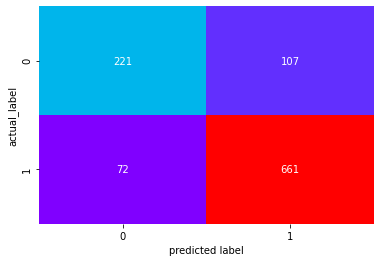

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [180]:
# performance on train set
ytrain_predict=logs_model.predict(X_train)
model_score=logs_model.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predict))
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual_label")
plt.show()
print(classification_report(y_train,ytrain_predict))

0.8355263157894737
[[ 86  46]
 [ 29 295]]


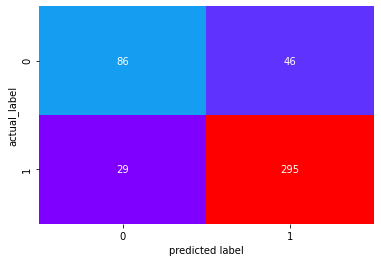

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       132
           1       0.87      0.91      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.83      0.84      0.83       456



In [181]:
# performance on test set
ytest_predict=logs_model.predict(X_test)
model_score=logs_model.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predict))
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual_label")
plt.show()
print(classification_report(y_test,ytest_predict))

AUC: 0.888


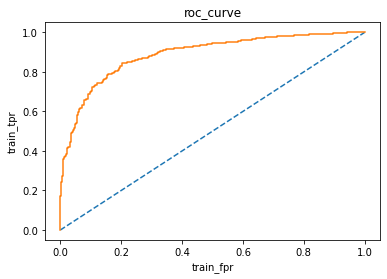

In [188]:
# for train set
# predict probabilities
ytrain_predict_prob = logs_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob=ytrain_predict_prob[:,1]
# calculate AUC
train_auc = roc_auc_score(y_train, ytrain_predict_prob)
print('AUC: %.3f' % train_auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,ytrain_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel("train_fpr")
plt.ylabel("train_tpr")
plt.title("roc_curve")
plt.show()

AUC: 0.890


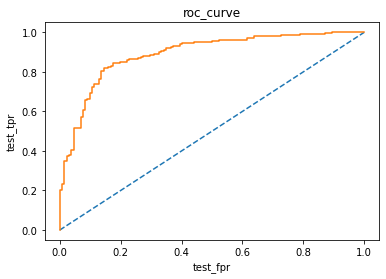

In [190]:
# for test set
# predict probabilities
ytest_predict_prob = logs_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob=ytest_predict_prob[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test, ytest_predict_prob)
print('AUC: %.3f' % test_auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,ytest_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("test_fpr")
plt.ylabel("test_tpr")
plt.title("roc_curve")
plt.show()

In [ ]:
# AUC on test set is more than train set: no overfitting

In [167]:
# After model tuning:Logistic Regression

0.8331762488218661
[[218 110]
 [ 67 666]]


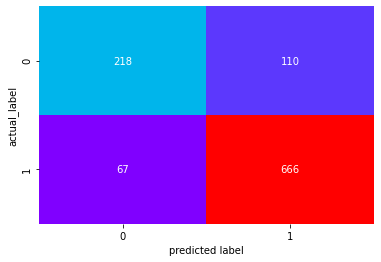

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       328
           1       0.86      0.91      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [168]:
# for train set
ytrain_predictb=best_grid.predict(X_train)
model_score=best_grid.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb))
sns.heatmap(confusion_matrix(y_train,ytrain_predictb),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual_label")
plt.show()
print(classification_report(y_train,ytrain_predictb))

0.7866144810834192


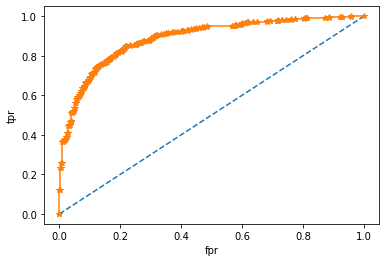

In [96]:
from sklearn.metrics import roc_curve,roc_auc_score

probs=best_grid.predict_proba(X_train)
probs=probs[:,1]
roc_auc_score_dev=roc_auc_score(y_train,ytrain_predictb)
print(roc_auc_score_dev)
fpr,tpr,threshold=roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

0.8333333333333334
[[ 86  46]
 [ 30 294]]


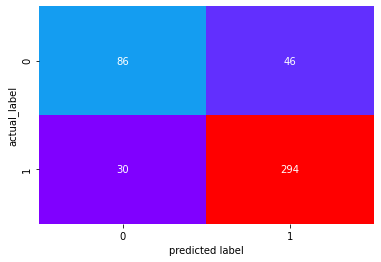

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       132
           1       0.86      0.91      0.89       324

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



In [97]:

# performance on test set
ytest_predictb=best_grid.predict(X_test)
model_score=best_grid.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predictb))
sns.heatmap(confusion_matrix(y_test,ytest_predictb),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual_label")
plt.show()
print(classification_report(y_test,ytest_predictb))

0.7794612794612794


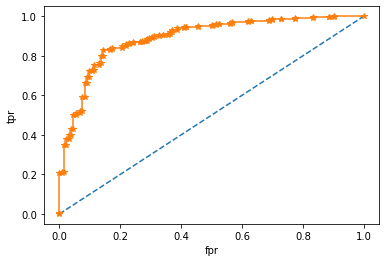

In [98]:
from sklearn.metrics import roc_curve,roc_auc_score

probs=best_grid.predict_proba(X_test)
probs=probs[:,1]
roc_auc_score_dev=roc_auc_score(y_test,ytest_predictb)
print(roc_auc_score_dev)
fpr,tpr,threshold=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [ ]:
# after model tuning,AUC performance decreases: overfitting

# For Linear Discriminant Analysis

In [99]:
# basic model

0.8312912346842601
[[222 106]
 [ 73 660]]


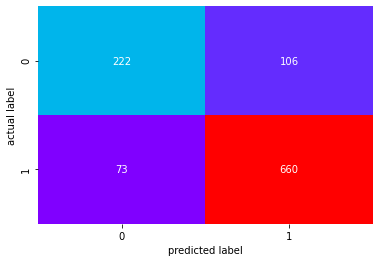

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [115]:
# performance on training set
ytrain_predict1=lda_model.predict(X_train)
model_score=lda_model.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predict1))
sns.heatmap(confusion_matrix(y_train,ytrain_predict1),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_train,ytrain_predict1))

In [116]:
# performance of roc_auc and roc_curve on train set

AUC: 0.887


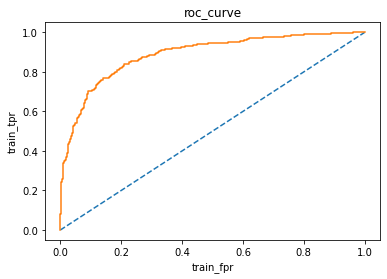

In [117]:
# for train set
# predict probabilities
ytrain_predict_prob1 = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob1=ytrain_predict_prob1[:,1]
# calculate AUC
train_auc = roc_auc_score(y_train, ytrain_predict_prob1)
print('AUC: %.3f' % train_auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,ytrain_predict_prob1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel("train_fpr")
plt.ylabel("train_tpr")
plt.title("roc_curve")
plt.show()

0.8333333333333334
[[ 87  45]
 [ 31 293]]


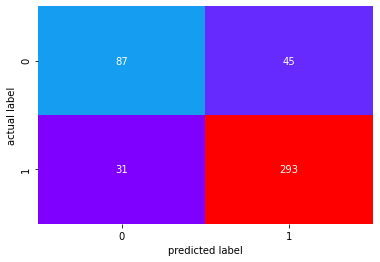

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       132
           1       0.87      0.90      0.89       324

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



In [114]:
# performance on test set
ytest_predict1=lda_model.predict(X_test)
model_score=lda_model.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predict1))
sns.heatmap(confusion_matrix(y_test,ytest_predict1),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_test,ytest_predict1))

AUC: 0.890


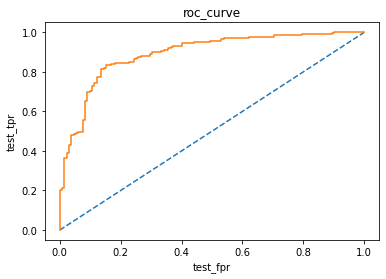

In [119]:
# for test set
# predict probabilities
ytest_predict_prob1 = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob1=ytest_predict_prob1[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test, ytest_predict_prob)
print('AUC: %.3f' % test_auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,ytest_predict_prob1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("test_fpr")
plt.ylabel("test_tpr")
plt.title("roc_curve")
plt.show()

In [ ]:
# AUC on test increases: no overfitting

In [ ]:
# after model tuning:LDA

In [216]:
# for train set
ytrain_predictb1=best_grid1.predict(X_train)

0.8312912346842601
[[222 106]
 [ 73 660]]


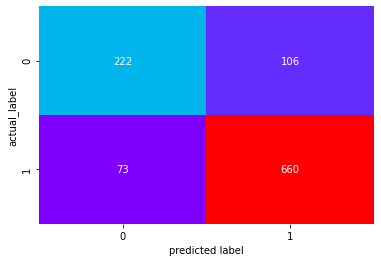

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       328
           1       0.86      0.90      0.88       733

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [217]:
# for train set
ytrain_predictb1=best_grid1.predict(X_train)
model_score=best_grid1.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb1))
sns.heatmap(confusion_matrix(y_train,ytrain_predictb1),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual_label")
plt.show()
print(classification_report(y_train,ytrain_predictb1))

In [142]:
# performance of roc_curve and roc_auc on train set

0.7886192726183742


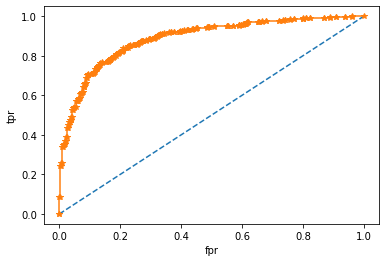

In [220]:
probs=best_grid1.predict_proba(X_train)
probs=probs[:,1]
roc_auc_score_dev=roc_auc_score(y_train,ytrain_predictb1)
print(roc_auc_score_dev)
fpr,tpr,threshold=roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

0.8333333333333334
[[ 87  45]
 [ 31 293]]


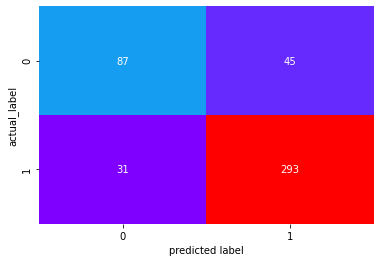

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       132
           1       0.87      0.90      0.89       324

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



In [219]:
# for test set
ytest_predictb1=best_grid1.predict(X_test)
model_score=best_grid1.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predictb1))
sns.heatmap(confusion_matrix(y_test,ytest_predictb1),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual_label")
plt.show()
print(classification_report(y_test,ytest_predictb1))

0.7817059483726152


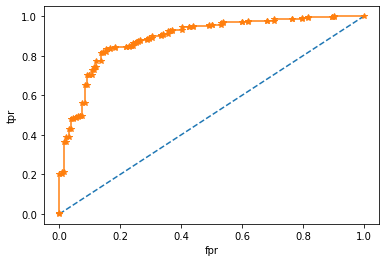

In [379]:
probs=best_grid1.predict_proba(X_test)
probs=probs[:,1]
roc_auc_score_dev=roc_auc_score(y_test,ytest_predictb1)
print(roc_auc_score_dev)
fpr,tpr,threshold=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [ ]:
# After model tuning: no overfitting

#  For KNN model:

In [ ]:
# performane metrics: acuuracy,confusion_matrix,classification report

0.8567389255419415
[[242  86]
 [ 66 667]]


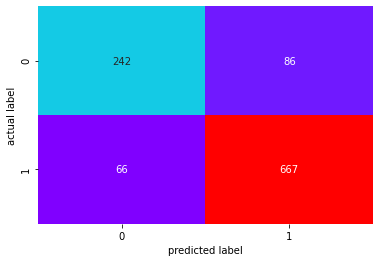

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       328
           1       0.89      0.91      0.90       733

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.85      0.86      0.86      1061



In [175]:
# for train set
ytrain_predict2=knn_model.predict(X_train)
model_score=knn_model.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predict2))
sns.heatmap(confusion_matrix(y_train,ytrain_predict2),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_train,ytrain_predict2))

In [ ]:
# performance of roc_aucand roc_curve 

AUC: 0.928


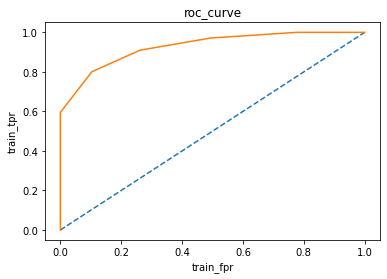

In [176]:
# for train
ytrain_predict_prob2= knn_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob2=ytrain_predict_prob2[:,1]
# calculate AUC
train_auc = roc_auc_score(y_train, ytrain_predict_prob2)
print('AUC: %.3f' % train_auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,ytrain_predict_prob2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel("train_fpr")
plt.ylabel("train_tpr")
plt.title("roc_curve")
plt.show()

0.7785087719298246
[[ 73  59]
 [ 42 282]]


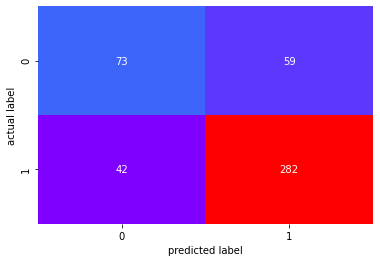

              precision    recall  f1-score   support

           0       0.63      0.55      0.59       132
           1       0.83      0.87      0.85       324

    accuracy                           0.78       456
   macro avg       0.73      0.71      0.72       456
weighted avg       0.77      0.78      0.77       456



In [177]:
# for test set
ytest_predict2=knn_model.predict(X_test)
model_score=knn_model.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predict2))
sns.heatmap(confusion_matrix(y_test,ytest_predict2),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_test,ytest_predict2))

AUC: 0.824


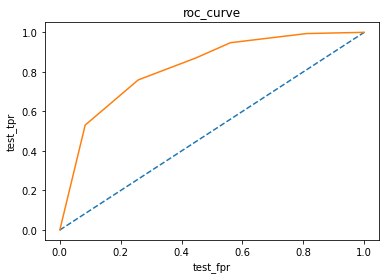

In [178]:
# test set
ytest_predict_prob2 = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob2=ytest_predict_prob2[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test, ytest_predict_prob2)
print('AUC: %.3f' % test_auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,ytest_predict_prob2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("test_fpr")
plt.ylabel("test_tpr")
plt.title("roc_curve")
plt.show()

In [ ]:
# AUC performance on test set decreases: overfitting

In [179]:
# After model tuning:KNN

0.8576814326107446
[[245  83]
 [ 68 665]]


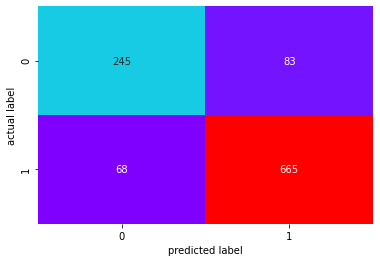

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       328
           1       0.89      0.91      0.90       733

    accuracy                           0.86      1061
   macro avg       0.84      0.83      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [380]:
# for train set:
# performance on train set
ytrain_predictb2=best_grid2.predict(X_train)
model_score=best_grid2.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb2))
sns.heatmap(confusion_matrix(y_train,ytrain_predictb2),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_train,ytrain_predictb2))

0.827090889428676


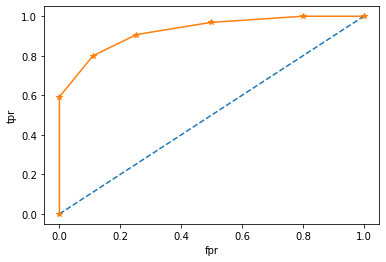

In [211]:
# for train set
probs=best_grid2.predict_proba(X_train)
probs=probs[:,1]
roc_auc_score_dev=roc_auc_score(y_train,ytrain_predictb2)
print(roc_auc_score_dev)
fpr,tpr,threshold=roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

0.7807017543859649
[[ 74  58]
 [ 42 282]]


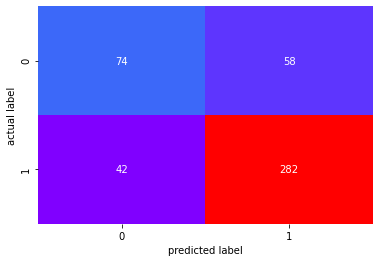

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       132
           1       0.83      0.87      0.85       324

    accuracy                           0.78       456
   macro avg       0.73      0.72      0.72       456
weighted avg       0.77      0.78      0.78       456



In [381]:
# performance on test set
ytest_predictb2=best_grid2.predict(X_test)
model_score=best_grid2.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predictb2))
sns.heatmap(confusion_matrix(y_test,ytest_predictb2),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_test,ytest_predictb2))

0.7154882154882154


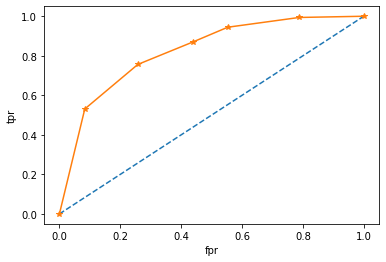

In [383]:
# for test set
probs=best_grid2.predict_proba(X_test)
probs=probs[:,1]
roc_auc_score_hold=roc_auc_score(y_test,ytest_predictb2)
print(roc_auc_score_hold)
fpr,tpr,threshold=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [ ]:
# after model tuning:AUC performance on test set decreases: overfitting

# for SVM model

In [ ]:
# basic model

0.9255419415645617
[[274  54]
 [ 25 708]]


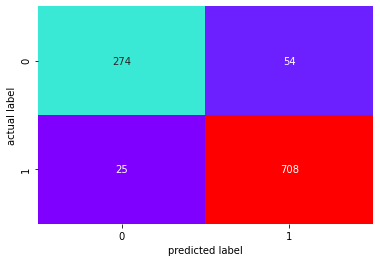

              precision    recall  f1-score   support

           0       0.92      0.84      0.87       328
           1       0.93      0.97      0.95       733

    accuracy                           0.93      1061
   macro avg       0.92      0.90      0.91      1061
weighted avg       0.93      0.93      0.92      1061



In [221]:
# performance matrix on train set
from sklearn.metrics import confusion_matrix,classification_report
y_train_predict4 = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict4))
sns.heatmap(confusion_matrix(y_train, y_train_predict4),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_train, y_train_predict4))

AUC: 0.980


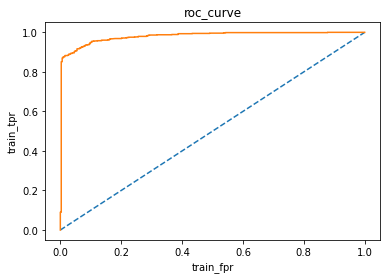

In [234]:
# for train
ytrain_predict_prob4= SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob4=ytrain_predict_prob4[:,1]
# calculate AUC
train_auc = roc_auc_score(y_train, ytrain_predict_prob4)
print('AUC: %.3f' % train_auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,ytrain_predict_prob4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel("train_fpr")
plt.ylabel("train_tpr")
plt.title("roc_curve")
plt.show()

0.8070175438596491
[[ 73  59]
 [ 29 295]]


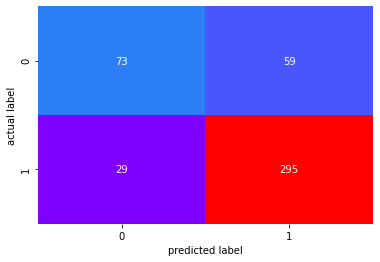

              precision    recall  f1-score   support

           0       0.72      0.55      0.62       132
           1       0.83      0.91      0.87       324

    accuracy                           0.81       456
   macro avg       0.77      0.73      0.75       456
weighted avg       0.80      0.81      0.80       456



In [235]:
# performance matrix on test set
from sklearn.metrics import confusion_matrix,classification_report
y_test_predict4 = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict4))
sns.heatmap(confusion_matrix(y_test, y_test_predict4),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_test, y_test_predict4))

AUC: 0.980


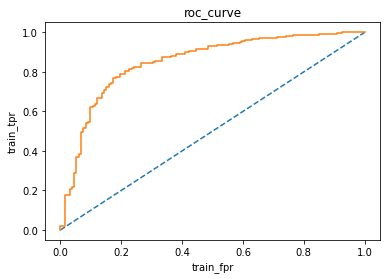

In [236]:
# for test
ytest_predict_prob4= SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob4=ytest_predict_prob4[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test, ytest_predict_prob4)
print('AUC: %.3f' % train_auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,ytest_predict_prob4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("test_fpr")
plt.ylabel("test_tpr")
plt.title("roc_curve")
plt.show()

In [ ]:
# no overfitting

In [ ]:
# after model tunning

In [237]:
# for train set

0.8378887841658812
[[217 111]
 [ 61 672]]


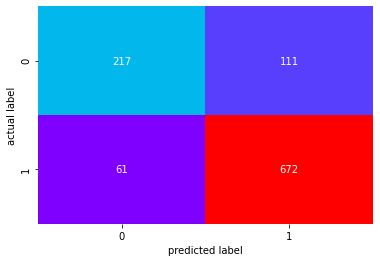

              precision    recall  f1-score   support

           0       0.78      0.66      0.72       328
           1       0.86      0.92      0.89       733

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [238]:
# performance on train set
ytrain_predictb3=best_grid3.predict(X_train)
model_score=best_grid3.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predictb3))
sns.heatmap(confusion_matrix(y_train,ytrain_predictb3),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_train,ytrain_predictb3))

0.7891828602801718


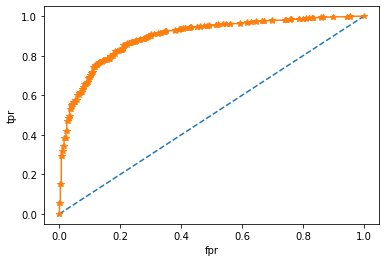

In [250]:
probs=best_grid3.predict_proba(X_train)
probs=probs[:,1]
roc_auc_score_dev=roc_auc_score(y_train,ytrain_predictb3)
print(roc_auc_score_dev)
fpr,tpr,threshold=roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

0.8267543859649122
[[ 85  47]
 [ 32 292]]


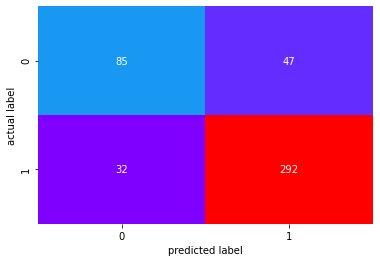

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       132
           1       0.86      0.90      0.88       324

    accuracy                           0.83       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.82      0.83      0.82       456



In [252]:
# performance on test set
ytest_predictb3=best_grid3.predict(X_test)
model_score=best_grid3.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predictb3))
sns.heatmap(confusion_matrix(y_test,ytest_predictb3),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_test,ytest_predictb3))

0.7725869809203143


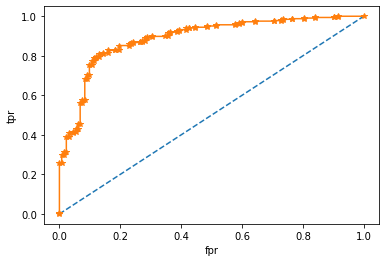

In [253]:
# for test set
probs=best_grid3.predict_proba(X_test)
probs=probs[:,1]
roc_auc_score_hold=roc_auc_score(y_test,ytest_predictb3)
print(roc_auc_score_hold)
fpr,tpr,threshold=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [ ]:
# overfitting

# for Naive Bayes model

0.825636192271442
[[230  98]
 [ 87 646]]


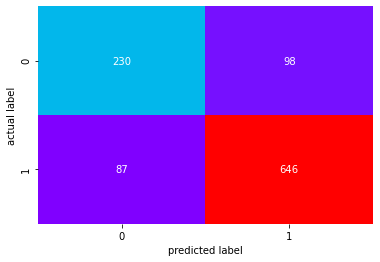

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       328
           1       0.87      0.88      0.87       733

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [265]:
# performance matrix on train set
ytrain_predict3=nb_model.predict(X_train)
model_score=nb_model.score(X_train,y_train)
print(model_score)
print(confusion_matrix(y_train,ytrain_predict3))
sns.heatmap(confusion_matrix(y_train,ytrain_predict3),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_train,ytrain_predict3))


AUC: 0.883


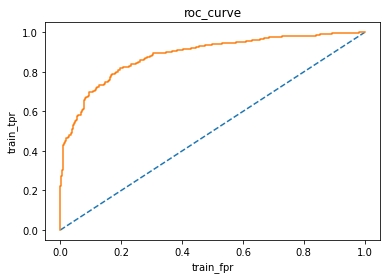

In [268]:
# for train
ytrain_predict_prob3= nb_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob3=ytrain_predict_prob3[:,1]
# calculate AUC
train_auc = roc_auc_score(y_train, ytrain_predict_prob3)
print('AUC: %.3f' % train_auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,ytrain_predict_prob3)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel("train_fpr")
plt.ylabel("train_tpr")
plt.title("roc_curve")
plt.show()

0.8464912280701754
[[ 95  37]
 [ 33 291]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       132
           1       0.89      0.90      0.89       324

    accuracy                           0.85       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.85      0.85      0.85       456



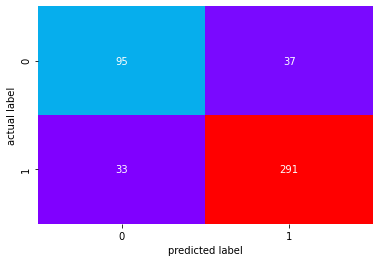

In [267]:
# performance matrix on test set
ytest_predict3=nb_model.predict(X_test)
model_score=nb_model.score(X_test,y_test)
print(model_score)
print(confusion_matrix(y_test,ytest_predict3))
sns.heatmap(confusion_matrix(y_test,ytest_predict3),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
print(classification_report(y_test,ytest_predict3))


AUC: 0.883


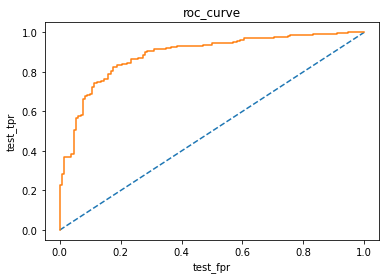

In [269]:
# for test
ytest_predict_prob3= nb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob3=ytest_predict_prob3[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test, ytest_predict_prob3)
print('AUC: %.3f' % train_auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,ytest_predict_prob3)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("test_fpr")
plt.ylabel("test_tpr")
plt.title("roc_curve")
plt.show()

In [ ]:
# overfitting

In [ ]:
# model tunning is not possible in case of Naive Bayes Model.Only two parameter are available var_smoothing and prior.

# Bagging:with Random Forest

0.9688972667295005
[[305  23]
 [ 10 723]]


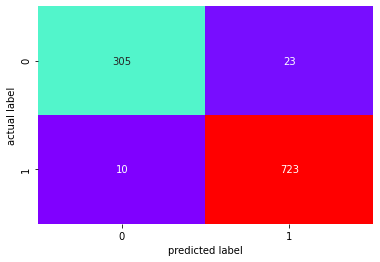

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       328
           1       0.97      0.99      0.98       733

    accuracy                           0.97      1061
   macro avg       0.97      0.96      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [38]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_train, y_train_predict))

AUC: 0.998


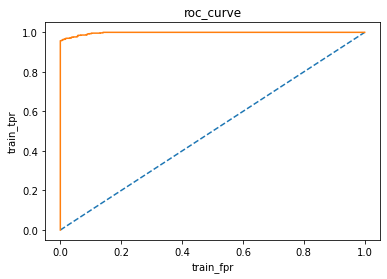

In [277]:
# for train
ytrain_predict_prob= Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob=ytrain_predict_prob[:,1]
# calculate AUC
train_auc = roc_auc_score(y_train, ytrain_predict_prob)
print('AUC: %.3f' % train_auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,ytrain_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel("train_fpr")
plt.ylabel("train_tpr")
plt.title("roc_curve")
plt.show()

0.8442982456140351
[[ 90  42]
 [ 29 295]]


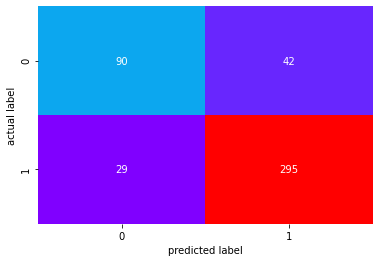

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       132
           1       0.88      0.91      0.89       324

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



In [276]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score =Bagging_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_test, y_test_predict))

AUC: 0.998


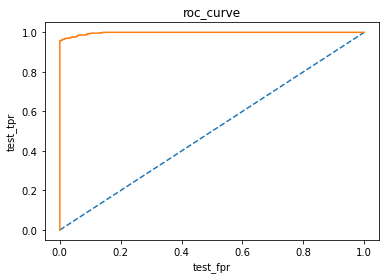

In [278]:
# for test set
ytest_predict_prob= Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob=ytest_predict_prob[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test, ytest_predict_prob)
print('AUC: %.3f' % train_auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,ytest_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel("test_fpr")
plt.ylabel("test_tpr")
plt.title("roc_curve")
plt.show()

In [ ]:
# overfitting

# Boosting

# Ada Boost

0.8454288407163054
[[235  93]
 [ 71 662]]


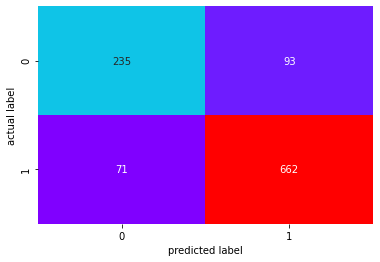

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       328
           1       0.88      0.90      0.89       733

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.84      0.85      0.84      1061



In [290]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_train, y_train_predict))

AUC: 0.913


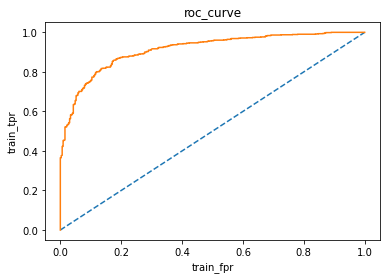

In [292]:
# for train
ytrain_predict_prob= ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob=ytrain_predict_prob[:,1]
# calculate AUC
train_auc = roc_auc_score(y_train, ytrain_predict_prob)
print('AUC: %.3f' % train_auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,ytrain_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel("train_fpr")
plt.ylabel("train_tpr")
plt.title("roc_curve")
plt.show()

0.8333333333333334
[[ 89  43]
 [ 33 291]]


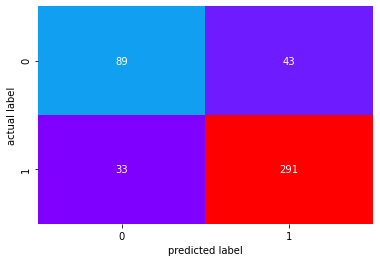

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       132
           1       0.87      0.90      0.88       324

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.83      0.83      0.83       456



In [291]:
## Performance Matrix on test set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_test, y_test_predict))

AUC: 0.913


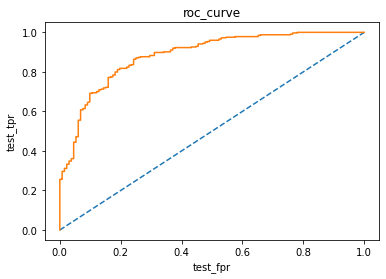

In [293]:
# for test set
ytest_predict_prob= ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob=ytest_predict_prob[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test, ytest_predict_prob)
print('AUC: %.3f' % train_auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,ytest_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("test_fpr")
plt.ylabel("test_tpr")
plt.title("roc_curve")
plt.show()

In [ ]:
# no overfitting

# XG Boost:

0.8878416588124411
[[261  67]
 [ 52 681]]


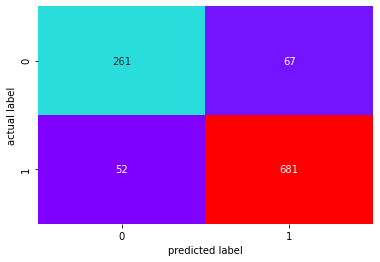

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       328
           1       0.91      0.93      0.92       733

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [298]:
## Performance Matrix on train set
y_train_predict1 = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict1))
sns.heatmap(confusion_matrix(y_train, y_train_predict1),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_train, y_train_predict1))

AUC: 0.945


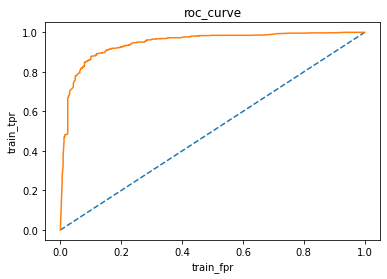

In [300]:
# for train
ytrain_predict_prob= XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob=ytrain_predict_prob[:,1]
# calculate AUC
train_auc = roc_auc_score(y_train, ytrain_predict_prob)
print('AUC: %.3f' % train_auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,ytrain_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel("train_fpr")
plt.ylabel("train_tpr")
plt.title("roc_curve")
plt.show()

0.8399122807017544
[[ 93  39]
 [ 34 290]]


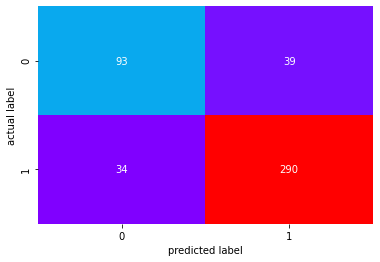

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       132
           1       0.88      0.90      0.89       324

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



In [299]:
## Performance Matrix on test set
y_test_predict1 = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict1))
sns.heatmap(confusion_matrix(y_test, y_test_predict1),annot=True,fmt="d",cbar=False,cmap="rainbow")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()
print(classification_report(y_test, y_test_predict1))

AUC: 0.945


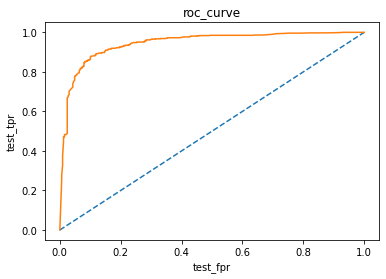

In [301]:
# for test
ytest_predict_prob= XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob=ytest_predict_prob[:,1]
# calculate AUC
test_auc = roc_auc_score(y_test, ytest_predict_prob)
print('AUC: %.3f' % train_auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,ytest_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel("test_fpr")
plt.ylabel("test_tpr")
plt.title("roc_curve")
plt.show()

In [ ]:
# AUC performance on train and test set are equal.It means no overfitting.


### Comparision:

For basic model:
Recall for Logistic regression and SVM for test set is more (0.91)than others model for test set. It means Logistic Regression 
and SVM is the best model.Although AUC for Logistic regression(o.89) and SVM model(0.98) is good for test set in both model and  there is no over fitting problem. We will consider SVM is as best model because AUC on test  set is higher than logistic regression model.
                                    “SVM is best model among all basic model.”
    
After model tuning:
Recall is highest(0.91) for logistic regression model on test set among all the model .Accuracy score(0.83) is also good for logistic regression on test set. AUC is also slightly differ on test set. We can consider as good.
     After model tuning we get,“ Logistic regression is best model.”
    
In case of Bagging and Boosting:
Recall(0.91) for bagging with random forest on test set is highest among all the model. AUC is also very good  for Bagging with random 
forest on test set .
                “Bagging with random forest is best model.”
    




## Conclusion:
Our main concern is which model is more accurately predicted class 1:majority class: labour group class. i.e. how many 
actual true data points are identified as true data points by model. Since recall for LDA model for test set is more than 
Logistic regression.

                               Before tuning: “SVM is best model.”
        
                             After model tuning:Logistic regression is best model.” 
                
    In case of Bagging and Boosting:”Bagging with random forest is best.”
        
                    Recall for all the three model on test is 0.91.
            
          Recall for actually predicted data point for labour class as labour class (true data points) is high.


# Inferences:

# 1.8 Based on these predictions, what are the insights? 

### Business insights and Recommendation:
-classes are partially separated for age and  well separated for Europen. We can conclude these two variables are good predictor.

-the people having economic.condtion is 5 whose maximum vote goes to labour party.

-the people having score towards europen integretion is low  whose maximum  no of vote goes to labour party.

-the  people whose economic.cond.national are 3,4and 5,did  maximum no of voting to labour group leader.

-Since concentration of dots is more for labour group as compared to conservative group for all age. So we can say ,people did 
voting to labour group.It means labour group party got maximum no of vote.

-female vote  mostly goes to conservative party.

                             Since, in exit poll  maximum no of people did voting to labour class, so we conclude Blair is winning who is the leader of labour class.
                 For business perspective ,we can use smote technique to get better result in Bagging and Boosting.



# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the
following speeches of the Presidents of the United States of America: President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
Find the number of characters, words and sentences for the mentioned documents. – 3 Marks
Remove all the stopwords from all the three speeches. – 3 Marks
Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks
Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]
Code Snippet to extract the three speeches:

"
import nltk

nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

inaugural.raw('1941-Roosevelt.txt')

inaugural.raw('1961-Kennedy.txt')

inaugural.raw('1973-Nixon.txt')
"


In [2]:
import re
import nltk


In [3]:
nltk.download("stopwords")
nltk.download("punket")
nltk.download("inaugural")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\star\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punket: Package 'punket' not found in index
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\star\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [4]:
from nltk.corpus import inaugural


In [5]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [132]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [133]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [134]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

## 2.1) Find the number of characters, words and sentences for the mentioned documents.

## no of  characters

In [135]:
doc1=inaugural.raw('1941-Roosevelt.txt')
print("no of charcters including spaces in doc1:",len(doc1))

no of charcters including spaces in doc1: 7571


In [136]:
doc2=inaugural.raw('1961-Kennedy.txt')
print("no of charcters including spaces in doc2:",len(doc2))

no of charcters including spaces in doc2: 7618


In [137]:
doc3=inaugural.raw('1973-Nixon.txt')
print("no of charcters including spaces in doc3:",len(doc3))

no of charcters including spaces in doc3: 9991


## total no words in each document

In [138]:
doc1=inaugural.raw('1941-Roosevelt.txt')
words=doc1.split(" ")
print("no of words in doc1 :",len(words))

no of words in doc1 : 1323


In [139]:
doc2=inaugural.raw('1961-Kennedy.txt')
words=doc2.split(" ")
print("no of words in doc2",len(words))

no of words in doc2 1364


In [140]:
doc3=inaugural.raw('1973-Nixon.txt')
words=doc3.split(" ")
print("no of words in doc3:",len(words))

no of words in doc3: 1769


# no of sentences in ech document

In [141]:
# first method

In [142]:
# for doc1
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

doc1=inaugural.raw('1941-Roosevelt.txt')
number_of_sentences = sent_tokenize(doc1)

print("no of sentences:",len(number_of_sentences))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\star\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
no of sentences: 68


In [143]:
# for doc2
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

doc1=inaugural.raw('1961-Kennedy.txt')
number_of_sentences = sent_tokenize(doc2)

print("no of sentences:",len(number_of_sentences))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\star\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
no of sentences: 52


In [144]:
# for doc3
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

doc1=inaugural.raw("1973-Nixon.txt")
number_of_sentences = sent_tokenize(doc3)

print("no of sentences:",len(number_of_sentences))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\star\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
no of sentences: 68


Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts 
like a word is a token in a sentence, and a sentence is a token in a paragraph. How sent_tokenize works ? The sent_tokenize
function uses an instance of PunktSentenceTokenizer from the nltk.

Key points :

-Text into sentences tokenization

-Sentences into words tokenization

-Sentences using regular expressions tokenization

-split the sentence into words,we have to import word_tokenize

-split the paragraph into sentences, we have to import sent_tokenize 


### second method: by regular expression

In [145]:
import re
doc1=inaugural.raw('1941-Roosevelt.txt')
no_of_sentences=re.split(r'[.!?+]', doc1)
print("total no of sentences:",len(no_of_sentences))

total no of sentences: 69


In [146]:
import re
doc2=inaugural.raw('1961-Kennedy.txt')
no_of_sentences=re.split(r'[.!?+]', doc2)
print("total no of sentences:",len(no_of_sentences))

total no of sentences: 58


In [147]:
import re
doc3=inaugural.raw('1973-Nixon.txt')
no_of_sentences=re.split(r'[.!?+]', doc3)
print("total no of sentences:",len(no_of_sentences))

total no of sentences: 73


# Basic Pre-Processing:

# lower case vonversion


In [148]:
doc1=inaugural.raw('1941-Roosevelt.txt')
lowercase_doc1=doc1.lower()
print(lowercase_doc1)

on each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states.

in washington's day the task of the people was to create and weld together a nation.

in lincoln's day the task of the people was to preserve that nation from disruption from within.

in this day the task of the people is to save that nation and its institutions from disruption from without.

to us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. if we do not, we risk the real peril of inaction.

lives of nations are determined not by the count of years, but by the lifetime of the human spirit. the life of a man is three-score years and ten: a little more, a little less. the life of a nation is the fullness of the measure of its will to live.

there are men who doubt this. there are men who believe that democracy, as a form 

In [149]:
doc2=inaugural.raw('1961-Kennedy.txt')
lowercase_doc2=doc2.lower()
print(lowercase_doc2)

vice president johnson, mr. speaker, mr. chief justice, president eisenhower, vice president nixon, president truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago.

the world is very different now. for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of god.

we dare not forget today that we are the heirs of that first revolution. let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation

In [150]:
doc3=inaugural.raw('1973-Nixon.txt')
lowecase_doc3=doc3.lower()
print(lowecase_doc3)

mr. vice president, mr. speaker, mr. chief justice, senator cook, mrs. eisenhower, and my fellow citizens of this great and good country we share together:

when we met here four years ago, america was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

as we meet here today, we stand on the threshold of a new era of peace in the world.

the central question before us is: how shall we use that peace? let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of america as we enter our third century as a nation.

this past year saw far-reaching results from our new policies for peace. by continuing to revitalize our traditional friendship

# removal of punctuation

In [151]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [152]:
doc1=inaugural.raw('1941-Roosevelt.txt')
doc1=doc1.replace('[^\w\s]','')
doc1= doc1.strip(string.punctuation)
print(doc1)

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [153]:
doc2=inaugural.raw('1961-Kennedy.txt')
doc2=doc2.replace('[^\w\s]','')
doc2= doc2.strip(string.punctuation,)
print(doc1)

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [154]:
doc3=inaugural.raw('1973-Nixon.txt')
doc3=doc3.replace('[^\w\s]','')
doc3= doc3.strip(string.punctuation)
print(doc3)

Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:

When we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

As we meet here today, we stand on the threshold of a new era of peace in the world.

The central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.

This past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional friendship

## 2.2) Remove all the stopwords from the three speeches.

In [155]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [156]:
print(stopwords.words('english')) # list of stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [157]:
doc1=inaugural.raw('1941-Roosevelt.txt')
stop_words=set(stopwords.words('english'))
word_tokens=word_tokenize(doc1)
filtered_sentence_doc1=[w for w in word_tokens if w not in stop_words]
# filtered_sentence=[]
#for w in word_tokens:
#    if w in not stop_words:
#         filtered_sentence.append(w)
print(filtered_sentence_doc1)


['On', 'national', 'day', 'inauguration', 'since', '1789', ',', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', '.', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', '.', 'To', 'us', 'come', 'time', ',', 'midst', 'swift', 'happenings', ',', 'pause', 'moment', 'take', 'stock', '--', 'recall', 'place', 'history', ',', 'rediscover', 'may', '.', 'If', ',', 'risk', 'real', 'peril', 'inaction', '.', 'Lives', 'nations', 'determined', 'count', 'years', ',', 'lifetime', 'human', 'spirit', '.', 'The', 'life', 'man', 'three-score', 'years', 'ten', ':', 'little', ',', 'little', 'less', '.', 'The', 'life', 'nation', 'fullness', 'measure', 'live', '.', 'There', 'men', 'doubt', '.', 'There', 'men', 'believe', 'democracy', ',', 'form', 'Government', 'fra

In [158]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [159]:
stop_words=set(stopwords.words("english"))
doc2=inaugural.raw('1961-Kennedy.txt')
words_token=word_tokenize(doc2)
filtered_sentence_doc2=[w for w in words_token if w not in stop_words]
print(filtered_sentence_doc2)
               

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'observe', 'today', 'victory', 'party', ',', 'celebration', 'freedom', '--', 'symbolizing', 'end', ',', 'well', 'beginning', '--', 'signifying', 'renewal', ',', 'well', 'change', '.', 'For', 'I', 'sworn', 'I', 'Almighty', 'God', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', '.', 'The', 'world', 'different', '.', 'For', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', '.', 'And', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', '--', 'belief', 'rights', 'man', 'come', 'generosity', 'state', ',', 'hand', 'God', '.', 'We', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', '.', 'Let', '

In [160]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [161]:
stop_words=set(stopwords.words("english"))
doc3=inaugural.raw('1973-Nixon.txt')
words_token=word_tokenize(doc3)
filtered_sentence_doc3=[w for w in words_token if w not in stop_words]
print(filtered_sentence_doc3)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', ':', 'When', 'met', 'four', 'years', 'ago', ',', 'America', 'bleak', 'spirit', ',', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', '.', 'As', 'meet', 'today', ',', 'stand', 'threshold', 'new', 'era', 'peace', 'world', '.', 'The', 'central', 'question', 'us', ':', 'How', 'shall', 'use', 'peace', '?', 'Let', 'us', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', ':', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', '.', 'Let', 'us', 'resolve', 'become', ':', 'time', 'great', 'responsibilities', 'greatly', 'borne', ',', 'renew', 'spirit', 'promise', 'America', 'enter', 'third', 'century', 'nation', '.', 'This', 'past', 'year', 'saw', 'far-reaching', 'results', 'new', '

## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words.  (after removing the stopwords)

In [162]:
nltk.FreqDist(filtered_sentence_doc1).most_common(3)

[(',', 77), ('.', 68), ('--', 25)]

In [163]:
nltk.FreqDist(filtered_sentence_doc2).most_common(3)

[(',', 84), ('.', 50), ('--', 25)]

In [164]:
nltk.FreqDist(filtered_sentence_doc3).most_common(3)

[(',', 96), ('.', 65), ('us', 26)]

## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

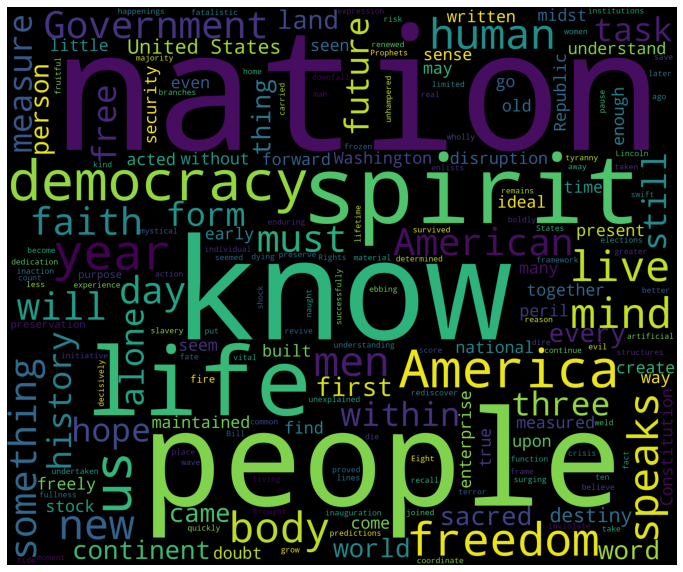

In [167]:
from wordcloud import WordCloud,STOPWORDS
doc1=inaugural.raw('1941-Roosevelt.txt')
cleaned_word = " ".join([word for word in doc1.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
# nation and people that most mentioned characteristics.
# Know,sprit,life are most popular words in doc1.


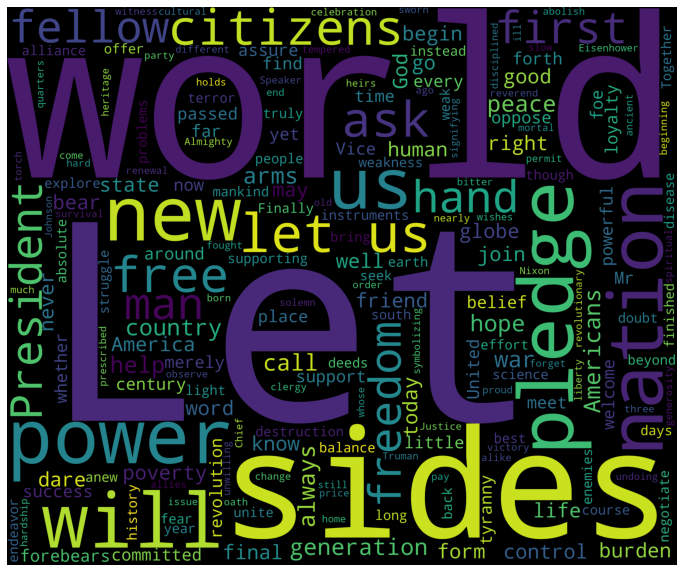

In [168]:
from wordcloud import WordCloud,STOPWORDS
doc2=inaugural.raw('1961-Kennedy.txt')
cleaned_word = " ".join([word for word in doc2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [170]:
# Let and world are most mentioned charactristics.
# sides,pledge,power are mostpopular words


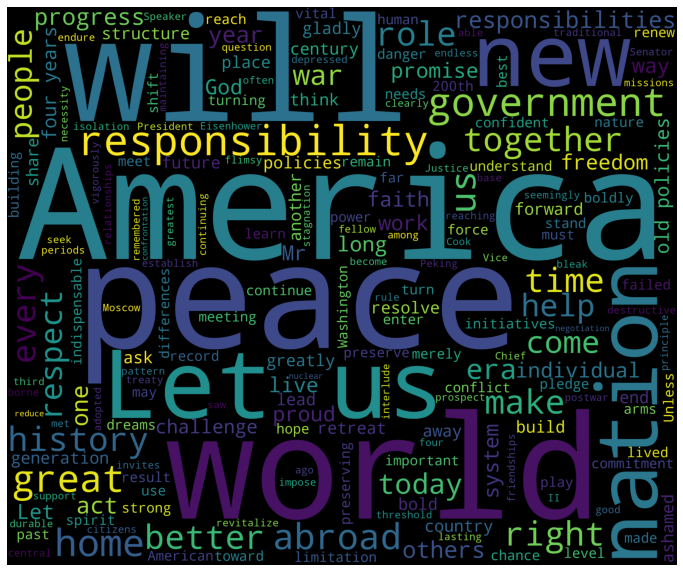

In [169]:
from wordcloud import WordCloud,STOPWORDS
doc3=inaugural.raw('1973-Nixon.txt')
cleaned_word = " ".join([word for word in doc3.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [171]:
# America is the most mentioned characteristics.
# peace,will,world are most popular world.
